In [2]:
import pandas as pd
import numpy as np


df_data_1 = pd.read_csv(BankChurners.csv)

#Use BankChurners.csv file provided ...


In [3]:
# This part has Several Useful Functions and Import of Packages that we need in the Modeling That Follows
#
#

from matplotlib import pyplot as plt
from scipy.stats import *
import numpy as np
from sklearn.preprocessing import LabelEncoder
import pylab as pl
import scipy.optimize as opt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import itertools
%matplotlib inline 


def histRetained(dFrame, coL):
    C = dFrame[coL][dFrame['Attrition_Flag'] == 0]
    C = C.sample(n=100,random_state=1)
#    plt.hist(C,color = 'green',edgecolor='white')
    C.plot(kind='hist',figsize = (10, 8),color ='green',edgecolor='blue')
#
# plot and plt.hist give about the same results!!
#
    plt.xlabel(coL.upper())
    plt.ylabel('Frequency of Retained Customers')
    plt.title('Histogram of Retained Credit Card Customers Size n = 100')
    plt.show()
    return

def histLost(dFrame, coL):
    C = dFrame[coL][dFrame['Attrition_Flag'] == 1]
    C = C.sample(n=100,random_state=1)
#    plt.hist(C,color = 'red',edgecolor='black')
    C.plot(kind = 'hist', figsize = (10,8),color='red',edgecolor='black')
#
# plot and plt.hist give about the same results!!
#
    plt.xlabel(coL.upper())
    plt.ylabel('Frequency of Lost Customers')
    plt.title('Histogram of Lost Credit Card Customers Size n = 100')
    plt.show()
    return
    
    
def boxPlot(dFrame,coL):
    dFrame[coL].plot(kind='box', figsize=(8, 6), color='black', vert=True)
    plt.title('Box plot of ' + coL.upper() + ' Feature')
    plt.ylabel('Statistics')
    plt.show()
    return


def describeData(dFrame,coLs):
    for coL in coLs:
        print(dFrame[coL].describe())
    return
    
    
def stats(dFrame,coLs):
    for coL in coLs:
        print('Statistics for Feature ', coL)
        print('Max = %.4f' % dFrame[coL].max())
        print('Min = %.4f' %dFrame[coL].min())
        print('Mean = %.4f' % dFrame[coL].mean())
        print('Skewness = %.4f' % dFrame[coL].skew())
        print('Kurtosis = %.4f' % dFrame[coL].kurtosis())
        print('------------------------------------------------------\n')
    return
    

def removeOutliers(dFrame,coLs): #Here coLs is a LIST of columns from which OUTLIERS are to be removed ...
    for coL in coLs:
        dFrame = dFrame[np.abs(zscore(dFrame[coL])) < 3.0]
    return dFrame


def zscoreData(dFrame,coLs): # Here coLs is a LIST of columns (numeric) whose contents you wish to normalize (z)
    for aCol in coLs:
#        dFrame[aCol] = (dFrame[aCol]-dFrame[aCol].mean())/dFrame[aCol].std()
        dFrame[aCol] = zscore(dFrame[aCol])
    return dFrame
    


def cleanData(dFrame, Feature): # Here Feature is a Column Feature of dFrame based on which any missing or NULL data is removed.
    dFrame = dFrame.drop_duplicates()
    dFrame.dropna(axis = 0, inplace = True)
    missing_data = dFrame.isnull()
    dFrame = dFrame[dFrame[Feature] != missing_data[Feature]]
    return dFrame
    

def LabelEncoding(dFrame,coLs):  # Here coLs is a LIST whose contents you wish to Label Encode 0, 1, 2, 3, ... etc.
    labelEncoder = LabelEncoder()
    for aCol in coLs:
        dFrame[aCol] = labelEncoder.fit_transform(dFrame[aCol])
    dFrame = pd.DataFrame(dFrame)
    return dFrame


def dropColumns(dFrame,coLs): # Here coLs is a list of columns to be dropped and must be passed as a LIST ...
    dFrame.drop(coLs, axis = 1, inplace = True)
    return dFrame

    
def oneHotEncoding(dFrame,coLs): # Here coLs is a LIST whose contents you wish to ONE-HOT encode ...
    for col in coLs:
        dFrame_oneHot = pd.get_dummies(dFrame[col],prefix = col, prefix_sep=" ").astype('int64')
        for oneHotcol in dFrame_oneHot.columns:
            dFrame[oneHotcol] = dFrame_oneHot[oneHotcol]
        dropColumns(dFrame, [col])
    return dFrame
    
    
def getFeatureColumns(dFrame,labelColumn):
    return [x for x in dFrame.columns if x != labelColumn]


def corRelation(dFrame): #Needs all columns to be at least Label Encoded Numerically
    XDIM, YDIM = dFrame.corr().shape
    for i in range(XDIM):
        for j in range(i+1,YDIM):
            if (dFrame.corr().iloc[i,j] > 0.7):
                print('Feature1 = ', dFrame.columns[i], 'Feature2 = ',dFrame.columns[j], 'Correlation = %.4f' % dFrame.corr().iloc[i,j])
    return
    

def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return


## PySpark Functions ...

def dropColumns(dFrame,coLs): # dFrame is a Pyspark Data Frame with coLs a list of columns we plan to drop from dFrame
    for x in coLs:
        dFrame = dFrame.drop(x)
    return dFrame

## Below is the Label Encoding Function ...

def LabelEncode(dFrame,coLs):  # Here dFrame is a Pyspark Data Frame and coLs is a List of columns for Label Encoding
    inputs = coLs
    outputs = []
    for input in inputs:
        outputs.append(input+'-Label')
    STINDEXER = STINDEX(inputCols = inputs, outputCols = outputs)
    MODEL = STINDEXER.fit(dFrame)
    dFrame = MODEL.transform(dFrame)
    for input in inputs:
        dFrame = dFrame.drop(input)
    return dFrame


## Below is a Function that Normalizes Numeric Column Data ...

def ZVALUES(dFrame, COLS):

# Here COLS is a List of Columns We Standardize to Mean = 0 and Standard Deviation = 1

# dFrame should be a Spark DataFrame
    
    from pyspark.sql.functions import stddev, mean, col, max, min
    for x in COLS:
        MEAN, STDEV = dFrame.select(mean(x), stddev(x)).first()
        dFrame = dFrame.withColumn("ZScore-"+x, (col(x) - MEAN)/STDEV)
        dFrame = dFrame.drop(x)
    return dFrame


## One Hot Encoding for dFrame

def oneHotEncoder(dFrame,inColumns,outColumns): # Here dFrame is a Spark Data Frame, inColumns and outColumns are Lists ...
    ENCODER = ONEHOT(inputCols = inColumns, outputCols = outColumns)
    MODEL = ENCODER.fit(dFrame)
    dFrame = MODEL.transform(dFrame)
    for col in inColumns:
        dFrame = dFrame.drop(col)
    return dFrame  

In [4]:
df1 = df_data_1

In [5]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown('# <span style="color:green">'+string+'</span>'))


if ('sc' in locals() or 'sc' in globals()):
    printmd('<<<<<!!!!! It seems that you are running in a IBM Watson Studio Apache Spark Notebook. Please run it in an IBM Watson Studio Default Runtime (without Apache Spark) !!!!!>>>>>')
else:
    printmd("All is Fine -- Proceed!")

# <span style="color:green">All is Fine -- Proceed!</span>

In [6]:
!pip install pyspark==3.0.0

     |████████████████████████████████| 204.7 MB 48 kB/s s eta 0:00:01
     |████████████████████████████████| 198 kB 66.8 MB/s eta 0:00:01
  Created wheel for pyspark: filename=pyspark-3.0.0-py2.py3-none-any.whl size=205044182 sha256=290fe50e4a94bc4ed196fa6b82d7581bf25dc21ed3bf2038a8007d0cbc761f66
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/4e/c5/36/aef1bb711963a619063119cc032176106827a129c0be20e301
Successfully built pyspark


In [7]:
try:
    from pyspark import SparkContext, SparkConf
    from pyspark.sql import SparkSession
    printmd("All Libraries Imported OK ... Please Proceed")
except ImportError as e:
    printmd('<<<<<!!!!! Please restart your kernel after installing Apache Spark !!!!!>>>>>')

# <span style="color:green">All Libraries Imported OK ... Please Proceed</span>

In [8]:
sc = SparkContext.getOrCreate(SparkConf().setMaster("local[*]"))

spark = SparkSession \
    .builder \
    .getOrCreate()

In [9]:
df1 = spark.createDataFrame(df1)

In [10]:
df1.count(), len(df1.columns)

(10127, 23)

## The plan: Clean Data, Drop Columns Not Needed, Take Out Outliers, Normalize, Label Encode, One Hot Encode (ETL Stuff..) Follow by Modeling ...

### Take Out Duplicates

In [10]:
df1 = df1.dropDuplicates()

In [11]:
df1 = df1.distinct()

### Take Out Null Values 

In [12]:
df1 = df1.na.drop()

In [13]:
df1.count()

10127

### Dropping Columns We Don't Need

In [14]:
colsToDrop = [df1.columns[0],df1.columns[-1],df1.columns[-2]]

In [15]:
df1 = dropColumns(df1, colsToDrop)

In [16]:
df1.columns

['Attrition_Flag',
 'Customer_Age',
 'Gender',
 'Dependent_count',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

In [27]:
for coL in df1.columns:
    df1.groupBy(coL).count().show()

+-----------------+-----+
|   Attrition_Flag|count|
+-----------------+-----+
|Existing Customer| 8500|
|Attrited Customer| 1627|
+-----------------+-----+

+------------+-----+
|Customer_Age|count|
+------------+-----+
|          26|   78|
|          29|   56|
|          65|  101|
|          54|  307|
|          34|  146|
|          50|  452|
|          57|  223|
|          43|  473|
|          32|  106|
|          31|   91|
|          39|  333|
|          68|    2|
|          58|  157|
|          63|   65|
|          27|   32|
|          51|  398|
|          56|  262|
|          52|  376|
|          41|  379|
|          33|  127|
+------------+-----+
only showing top 20 rows

+------+-----+
|Gender|count|
+------+-----+
|     F| 5358|
|     M| 4769|
+------+-----+

+---------------+-----+
|Dependent_count|count|
+---------------+-----+
|              0|  904|
|              5|  424|
|              1| 1838|
|              3| 2732|
|              2| 2655|
|              4| 1574|
+-----

### Removing Leading and Trailing White Spaces from Column Header Names

In [17]:
Replace = lambda x : x.strip()

In [18]:
for coL in df1.columns:
    coL = Replace(coL)

In [19]:
df1.columns

['Attrition_Flag',
 'Customer_Age',
 'Gender',
 'Dependent_count',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

In [86]:
#df1.createOrReplaceTempView('df1')

### Filtering Out Rows that Have Unknown Data or Missing Values or Null Values Etc.

In [20]:
colsToFilter = ['Education_Level','Income_Category','Marital_Status']

for coL in colsToFilter:
    df1 = df1.filter(df1[coL] != 'Unknown')

In [20]:
for coL in colsToFilter:
    df1.groupBy(coL).count().show()

+---------------+-----+
|Education_Level|count|
+---------------+-----+
|    High School| 1653|
|     Uneducated| 1204|
|  Post-Graduate|  431|
|      Doctorate|  358|
|       Graduate| 2591|
|        College|  844|
+---------------+-----+

+---------------+-----+
|Income_Category|count|
+---------------+-----+
|        $120K +|  572|
|    $60K - $80K| 1103|
|   $80K - $120K| 1202|
|    $40K - $60K| 1412|
| Less than $40K| 2792|
+---------------+-----+

+--------------+-----+
|Marital_Status|count|
+--------------+-----+
|       Married| 3564|
|      Divorced|  569|
|        Single| 2948|
+--------------+-----+



In [21]:
print("The Count = %d" % df1.count())

The Count = 7081


### Label Encoding or String Indexing Using Pyspark ML

In [21]:
from pyspark.ml.feature import StringIndexer as STINDEX

In [22]:
colsToIndex = ['Attrition_Flag','Gender','Education_Level','Marital_Status','Income_Category','Card_Category']

df1 = LabelEncode(df1,colsToIndex)

In [23]:
df1.columns

['Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',
 'Card_Category-Label',
 'Gender-Label',
 'Income_Category-Label',
 'Marital_Status-Label',
 'Attrition_Flag-Label',
 'Education_Level-Label']

In [27]:
for coL in colsToIndex:
    df1.groupBy(coL+'-Label').count().show()

+--------------------+-----+
|Attrition_Flag-Label|count|
+--------------------+-----+
|                 0.0| 5968|
|                 1.0| 1113|
+--------------------+-----+

+------------+-----+
|Gender-Label|count|
+------------+-----+
|         0.0| 3706|
|         1.0| 3375|
+------------+-----+

+---------------------+-----+
|Education_Level-Label|count|
+---------------------+-----+
|                  0.0| 2591|
|                  1.0| 1653|
|                  4.0|  431|
|                  3.0|  844|
|                  2.0| 1204|
|                  5.0|  358|
+---------------------+-----+

+--------------------+-----+
|Marital_Status-Label|count|
+--------------------+-----+
|                 0.0| 3564|
|                 1.0| 2948|
|                 2.0|  569|
+--------------------+-----+

+---------------------+-----+
|Income_Category-Label|count|
+---------------------+-----+
|                  0.0| 2792|
|                  1.0| 1412|
|                  4.0|  572|
|            

### Here we will need to first Normalize over Mean and Standard Deviation for df2 and then Convert Back to Spark DF to take Out Outliers using FILTER command ...

In [24]:
from pyspark.sql.functions import stddev, mean, col, max, min, abs, skewness, kurtosis

In [26]:
print("STD = %.4f" % df1.select(stddev("Dependent_count")).first()[0])

STD = 1.2916


In [25]:
df1.columns

['Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',
 'Card_Category-Label',
 'Gender-Label',
 'Income_Category-Label',
 'Marital_Status-Label',
 'Attrition_Flag-Label',
 'Education_Level-Label']

In [26]:
colsToStandardize = ['Customer_Age','Dependent_count','Months_on_book','Total_Relationship_Count','Months_Inactive_12_mon', \
                     'Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1', \
                     'Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']

In [70]:
df1 = ZVALUES(df1, colsToStandardize)

In [29]:
df1.columns

['Card_Category-Label',
 'Gender-Label',
 'Income_Category-Label',
 'Marital_Status-Label',
 'Attrition_Flag-Label',
 'Education_Level-Label',
 'ZScore-Customer_Age',
 'ZScore-Dependent_count',
 'ZScore-Months_on_book',
 'ZScore-Total_Relationship_Count',
 'ZScore-Months_Inactive_12_mon',
 'ZScore-Contacts_Count_12_mon',
 'ZScore-Credit_Limit',
 'ZScore-Total_Revolving_Bal',
 'ZScore-Avg_Open_To_Buy',
 'ZScore-Total_Amt_Chng_Q4_Q1',
 'ZScore-Total_Trans_Amt',
 'ZScore-Total_Trans_Ct',
 'ZScore-Total_Ct_Chng_Q4_Q1',
 'ZScore-Avg_Utilization_Ratio']

### Filter Out Outliers in the Above Normalized Columns with |z| > 3.0000

In [30]:
colsForOutliers = []

for coL in colsToStandardize:
    colsForOutliers.append("ZScore-"+coL)

for coL in colsForOutliers:
    print(coL)
#    df1 = df1.filter( (df1[coL] <= 3.0) & (df1[coL] >= -3))
    df1 = df1.filter(abs(df1[coL]) <= 3.0)

ZScore-Customer_Age
ZScore-Dependent_count
ZScore-Months_on_book
ZScore-Total_Relationship_Count
ZScore-Months_Inactive_12_mon
ZScore-Contacts_Count_12_mon
ZScore-Credit_Limit
ZScore-Total_Revolving_Bal
ZScore-Avg_Open_To_Buy
ZScore-Total_Amt_Chng_Q4_Q1
ZScore-Total_Trans_Amt
ZScore-Total_Trans_Ct
ZScore-Total_Ct_Chng_Q4_Q1
ZScore-Avg_Utilization_Ratio


In [27]:
df1.columns

['Card_Category-Label',
 'Gender-Label',
 'Income_Category-Label',
 'Marital_Status-Label',
 'Attrition_Flag-Label',
 'Education_Level-Label',
 'ZScore-Customer_Age',
 'ZScore-Dependent_count',
 'ZScore-Months_on_book',
 'ZScore-Total_Relationship_Count',
 'ZScore-Months_Inactive_12_mon',
 'ZScore-Contacts_Count_12_mon',
 'ZScore-Credit_Limit',
 'ZScore-Total_Revolving_Bal',
 'ZScore-Avg_Open_To_Buy',
 'ZScore-Total_Amt_Chng_Q4_Q1',
 'ZScore-Total_Trans_Amt',
 'ZScore-Total_Trans_Ct',
 'ZScore-Total_Ct_Chng_Q4_Q1',
 'ZScore-Avg_Utilization_Ratio']

In [28]:
df1.count()

6559

In [37]:
from pyspark.sql.functions import skewness, kurtosis, corr

In [38]:
for col in colsForOutliers:
    MAX, MIN, STDEV, SKEW, KURT = df1.select(max(col), min(col), stddev(col), skewness(col), kurtosis(col)).first()
    print("***********************************")
    print("Z Column = ", col)
    print("Max = %.4f" % MAX)
    print("Min = %.4f" % MIN)
    print("STDEV = %.4f" % STDEV)
    print("SKEWNESS = %.4f" % SKEW)
    print("KURTOSIS = %.4f" % KURT)
    print("***********************************\n")
    

***********************************
Z Column =  ZScore-Customer_Age
Max = 2.9414
Min = -2.5304
STDEV = 0.9949
SKEWNESS = -0.0382
KURTOSIS = -0.3415
***********************************

***********************************
Z Column =  ZScore-Dependent_count
Max = 2.0611
Min = -1.8099
STDEV = 0.9989
SKEWNESS = -0.0368
KURTOSIS = -0.6657
***********************************

***********************************
Z Column =  ZScore-Months_on_book
Max = 2.5015
Min = -2.8717
STDEV = 0.9977
SKEWNESS = -0.0752
KURTOSIS = 0.3104
***********************************

***********************************
Z Column =  ZScore-Total_Relationship_Count
Max = 1.4119
Min = -1.8255
STDEV = 0.9969
SKEWNESS = -0.1988
KURTOSIS = -0.9708
***********************************

***********************************
Z Column =  ZScore-Months_Inactive_12_mon
Max = 2.6705
Min = -2.3541
STDEV = 0.9315
SKEWNESS = 0.2062
KURTOSIS = -0.1276
***********************************

***********************************
Z Column =  ZS

In [35]:
from pyspark.sql.functions import corr, kurtosis, skewness

In [36]:
NUMBER_OF_FEATURES = len(df1.columns)

In [37]:
for i in range(6, NUMBER_OF_FEATURES):
    for j in range(i+1, NUMBER_OF_FEATURES):
        CORR = df1.select(corr(df1.columns[i],df1.columns[j])).first()[0]
#        print("The Columns are %s AND %s" % (df1.columns[i], df1.columns[j]))
        if float(CORR) > 0.7:
            print("Correlation Between %s and %s is %.4f" % (df1.columns[i],df1.columns[j],CORR))
    

Correlation Between ZScore-Customer_Age and ZScore-Months_on_book is 0.7914
Correlation Between ZScore-Credit_Limit and ZScore-Avg_Open_To_Buy is 0.9959
Correlation Between ZScore-Total_Trans_Amt and ZScore-Total_Trans_Ct is 0.7933


In [48]:
KURTOSIS = df1.select(kurtosis('ZScore-Customer_Age')).first()

In [49]:
print("The Kurtosis is %.4f" % KURTOSIS)

The Kurtosis is -0.3415


In [50]:
SKEWNESS = df1.select(skewness('ZScore-Credit_Limit')).first()

In [51]:
print("The Skewness is %.4f" % SKEWNESS)

The Skewness is 1.7544


### Now Let's Proceed with One Hot Encoding on the Gender Column ...

In [31]:
from pyspark.ml.feature import OneHotEncoder as ONEHOT

#from pyspark.ml.feature.OneHotEncoder(self, includeFirst=True, inputCol=None, outputCol=None)[source]¶

In [32]:
df1 = oneHotEncoder(df1,['Gender-Label'],['Hot-Gender-Label'])

In [33]:
df1.select(['Hot-Gender-Label']).show(10)

+----------------+
|Hot-Gender-Label|
+----------------+
|   (1,[0],[1.0])|
|   (1,[0],[1.0])|
|   (1,[0],[1.0])|
|   (1,[0],[1.0])|
|       (1,[],[])|
|   (1,[0],[1.0])|
|   (1,[0],[1.0])|
|   (1,[0],[1.0])|
|       (1,[],[])|
|       (1,[],[])|
+----------------+
only showing top 10 rows



In [34]:
df1.columns

['Card_Category-Label',
 'Income_Category-Label',
 'Marital_Status-Label',
 'Attrition_Flag-Label',
 'Education_Level-Label',
 'ZScore-Customer_Age',
 'ZScore-Dependent_count',
 'ZScore-Months_on_book',
 'ZScore-Total_Relationship_Count',
 'ZScore-Months_Inactive_12_mon',
 'ZScore-Contacts_Count_12_mon',
 'ZScore-Credit_Limit',
 'ZScore-Total_Revolving_Bal',
 'ZScore-Avg_Open_To_Buy',
 'ZScore-Total_Amt_Chng_Q4_Q1',
 'ZScore-Total_Trans_Amt',
 'ZScore-Total_Trans_Ct',
 'ZScore-Total_Ct_Chng_Q4_Q1',
 'ZScore-Avg_Utilization_Ratio',
 'Hot-Gender-Label']

### Extracting a Column as a List from Spark Data Frame

In [35]:
mm = df1.select("ZScore-Customer_Age").rdd.map(lambda x : x[0]).collect()

In [37]:
type(mm)

list

In [178]:
mmList = []
for i in range(len(mm)):
    mmList.append(mm[i][0])

#### Another Example of Extracting Column as List ...

In [95]:
vv = df1.select("Hot-Gender-Label").collect()

In [96]:
vvList = []
for i in range(len(vv)):
    vvList.append(vv[i][0])

### Let's try some Clustering Algorithms (Unsupervised ML)

### (a) Using KMeans Clustering ... 

In [35]:
df1Label = 'Attrition_Flag-Label'

In [36]:
df2 = df1.drop(df1Label)

In [37]:
df2.columns

['Card_Category-Label',
 'Income_Category-Label',
 'Marital_Status-Label',
 'Education_Level-Label',
 'ZScore-Customer_Age',
 'ZScore-Dependent_count',
 'ZScore-Months_on_book',
 'ZScore-Total_Relationship_Count',
 'ZScore-Months_Inactive_12_mon',
 'ZScore-Contacts_Count_12_mon',
 'ZScore-Credit_Limit',
 'ZScore-Total_Revolving_Bal',
 'ZScore-Avg_Open_To_Buy',
 'ZScore-Total_Amt_Chng_Q4_Q1',
 'ZScore-Total_Trans_Amt',
 'ZScore-Total_Trans_Ct',
 'ZScore-Total_Ct_Chng_Q4_Q1',
 'ZScore-Avg_Utilization_Ratio',
 'Hot-Gender-Label']

In [38]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler

In [42]:
vectorAssembler = VectorAssembler(inputCols = df2.columns, outputCol = "features")

In [33]:
kmeans = KMeans().setK(2).setSeed(1)

In [34]:
pipeline = Pipeline(stages = [vectorAssembler, kmeans])

In [35]:
MODEL = pipeline.fit(df2)

In [36]:
PREDICTIONS = MODEL.transform(df2)

In [37]:
PREDICTIONS.select('prediction').show(5)

+----------+
|prediction|
+----------+
|         0|
|         0|
|         0|
|         1|
|         1|
+----------+
only showing top 5 rows



In [38]:
evaluator = ClusteringEvaluator()
silhouette = evaluator.evaluate(PREDICTIONS)
print("Silhouette with Squared Euclidean Distance = %.4f" % silhouette)

Silhouette with Squared Euclidean Distance = 0.2604


In [42]:
PREDICTIONS.columns

['Card_Category-Label',
 'Income_Category-Label',
 'Marital_Status-Label',
 'Education_Level-Label',
 'ZScore-Customer_Age',
 'ZScore-Dependent_count',
 'ZScore-Months_on_book',
 'ZScore-Total_Relationship_Count',
 'ZScore-Months_Inactive_12_mon',
 'ZScore-Contacts_Count_12_mon',
 'ZScore-Credit_Limit',
 'ZScore-Total_Revolving_Bal',
 'ZScore-Avg_Open_To_Buy',
 'ZScore-Total_Amt_Chng_Q4_Q1',
 'ZScore-Total_Trans_Amt',
 'ZScore-Total_Trans_Ct',
 'ZScore-Total_Ct_Chng_Q4_Q1',
 'ZScore-Avg_Utilization_Ratio',
 'Hot-Gender-Label',
 'features',
 'prediction']

In [39]:
df2Slice0 = PREDICTIONS.filter(PREDICTIONS['prediction'] == 0)

In [40]:
type(df2Slice0)

pyspark.sql.dataframe.DataFrame

In [41]:
df2Slice1 = PREDICTIONS.filter(PREDICTIONS['prediction'] == 1)

In [42]:
import numpy as np

In [51]:
Age0 = df2Slice0.select('ZScore-Customer_Age').rdd.map(lambda Row : Row[0]).collect()

In [52]:
Age1 = df2Slice1.select('ZScore-Customer_Age').rdd.map(lambda Row : Row[0]).collect()

In [53]:
len(Age1)

4235

In [54]:
from random import sample

In [55]:
Age0 = sample(Age0, 100)
Age1 = sample(Age1, 100)

In [57]:
from matplotlib import pyplot as plt

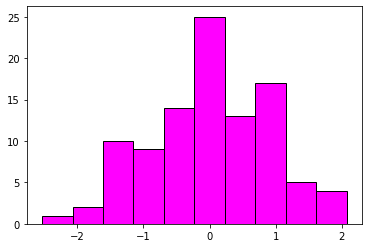

In [59]:
plt.hist(Age0, edgecolor = 'black', color = 'magenta')
plt.show()

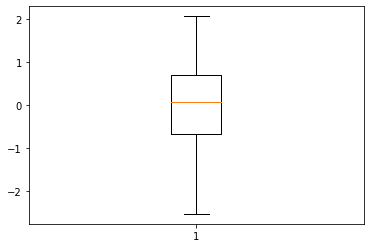

In [60]:
plt.boxplot(Age0)
plt.show()

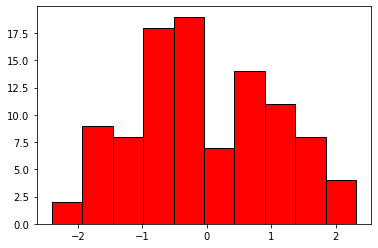

In [61]:
plt.hist(Age1,edgecolor = 'black', color = 'red')
plt.show()

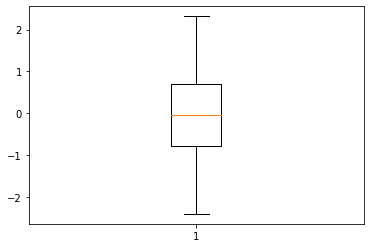

In [62]:
plt.boxplot(Age1)
plt.show()

In [64]:
Income0 = sample(df2Slice0.select('Income_Category-Label').rdd.map(lambda Row : Row[0]).collect(), 100)
Income1 = sample(df2Slice1.select('Income_Category-Label').rdd.map(lambda Row : Row[0]).collect(), 100)

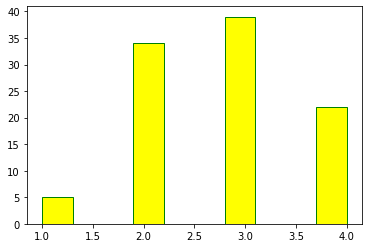

In [65]:
plt.hist(Income0, edgecolor = 'green', color = 'yellow')
plt.show()

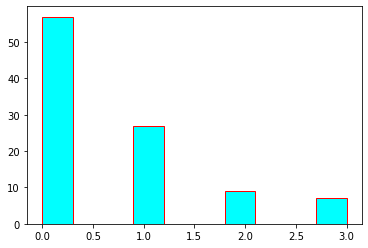

In [66]:
plt.hist(Income1, edgecolor = 'red', color = 'cyan')
plt.show()

### Beautiful Pictures Above!!

### (b) Using Latent Dirichlet Allocation (LDA)

In [72]:
from pyspark.ml.clustering import LDA

In [82]:
df2 = df1.drop(df1Label)

In [83]:
lda = LDA(k = 2, maxIter = 2)

In [84]:
vectorAssembler = VectorAssembler(inputCols = df2.columns, outputCol = "features")

In [85]:
pipeline = Pipeline(stages = [vectorAssembler, lda])

In [ ]:
MODEL = pipeline.fit(df2)

In [ ]:
PREDICTIONS = MODEL.transform(df2)

In [ ]:
ll = model.logLikelihood(dataset)
lp = model.logPerplexity(dataset)
print("The lower bound on the log likelihood of the entire corpus: " + str(ll))
print("The upper bound on perplexity: " + str(lp))

### (c) Using Bisecting K-Means

In [34]:
from pyspark.ml.clustering import BisectingKMeans

In [35]:
bkm = BisectingKMeans().setK(2).setSeed(1)

In [36]:
pipeline = Pipeline(stages = [vectorAssembler, bkm])

In [37]:
MODEL = pipeline.fit(df2)

In [38]:
PREDICTIONS = MODEL.transform(df2)

In [40]:
PREDICTIONS.select('prediction').show(5)

+----------+
|prediction|
+----------+
|         1|
|         1|
|         1|
|         0|
|         0|
+----------+
only showing top 5 rows



In [42]:
evaluator = ClusteringEvaluator()
silhouette = evaluator.evaluate(PREDICTIONS)
print("Silhouette with Squared Euclidean Distance = %.4f" % silhouette)

Silhouette with Squared Euclidean Distance = 0.2604


### (d) Using Gaussian Mixture Model (GMM)

In [39]:
from pyspark.ml.clustering import GaussianMixture as GMM

In [40]:
gmm = GMM().setK(2).setSeed(538009335)

In [43]:
pipeline = Pipeline(stages = [vectorAssembler, gmm])

In [44]:
MODEL = pipeline.fit(df2)

In [45]:
PREDICTIONS = MODEL.transform(df2)

In [46]:
PREDICTIONS.select('prediction').show(5)

+----------+
|prediction|
+----------+
|         1|
|         0|
|         0|
|         1|
|         1|
+----------+
only showing top 5 rows



In [47]:
evaluator = ClusteringEvaluator()
silhouette = evaluator.evaluate(PREDICTIONS)
print("Silhouette with Squared Euclidean Distance = %.4f" % silhouette)

Silhouette with Squared Euclidean Distance = 0.2118


#### Gaussian Mixture Model has the best Silhouette Score as of yet ...